# Initial research questions

* comparative analysis of gender representation in artwork creation between born digital and analogue art collections
* with also, potentially, some details on medium, location…
* semantic analysis of the narrative about the artworks or what are the keywords associated with different artwork types

### The story could be:
The internet was supposed to revolutionize things, so how did it do when looking at who makes art and who gets included in collections?


A simple way to plan your work is:

 * choose the research question
 * map the question to pieces of information needed to answer the question (e.g. periods, countings)
 * map the data to specific data types (categorical, numerical, ordinal)
 * choose the plot(s) that better help you to visualise some pattern (e.g. a bar chart)
 * get your data in some form (SPARQL query results)
 * filter/ manipulate your data (select the variables that matter, make operations like countings) 
 * create a data structure that fits the plotting requirements (a table, a JSON etc) including the number of variables needed (e.g. one categorical and one numerical)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [108]:
#IMPORT DATASETS
artists = pd.read_pickle('MOMA_data/pickle/MoMAartists.pkl')
before80 = pd.read_pickle('MOMA_data/pickle/old_artworks.pkl')
after80 = pd.read_pickle('MOMA_data/pickle/new_artworks.pkl')
rhizome = pd.read_pickle('Rhizome_data/rhizome_artworks_extra.pkl')



In [47]:
to_clean = before80[before80.ID.str.contains(',', regex= True, na=False)]
len(to_clean)

4860

In [48]:
to_clean = after80[after80.ID.str.contains(',', regex= True, na=False)]
len(to_clean)

2647

In [49]:
len(before80), len(after80), len(rhizome)


(103997, 34154, 2270)

### Further cleaning

In order to aviod mistakes when an artwork has multiple authors, I decided to divide them into new rows, obtaining a new dataframe having all rows corresponding to an artist. 

In [50]:
def remake_df(df):

    cols = df.columns
    to_clean = df[df.ID.str.contains(',', regex= True, na=False)]

    clean = pd.DataFrame(columns=cols)


    for ind, row in to_clean.iterrows():
        #enter in nationality cell, start counting the irtem loops for indexes
        ids = row.ID.split(', ')
        names = row.Artist.split(', ')
        nationalities = row.Nationality.split(', ')
        genders = row.Gender.split(', ')
        for idx, id in enumerate(ids):
            #make a new row for corresponding artist 
            new_row = row
            #change informations in the cells 
            new_row.ID = id
            new_row.Artist = names[idx]
            new_row.Nationality = nationalities[idx]
            new_row.Gender = genders[idx]
            clean.loc[len(clean)]= new_row
        df = df.drop(ind, axis=0)
    new = df.append(clean)

    return new

In [52]:
before80 =  remake_df(before80)



/var/folders/qj/xh48vw9d4z5_h6wzs6r2smdh0000gn/T/ipykernel_7917/2253168318.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = df.append(clean)


In [53]:
after80 = remake_df(after80)

/var/folders/qj/xh48vw9d4z5_h6wzs6r2smdh0000gn/T/ipykernel_7917/2253168318.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = df.append(clean)


In [ ]:
after80

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender,Source
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,1987,Paint and colored pencil on print,Architecture & Design,1995,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,French,M,MOMA
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,missing,M,MOMA
31,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/33,http://www.moma.org/media/W1siZiIsIjIwMCJdLFsi...,missing,M,MOMA
35,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/38,http://www.moma.org/media/W1siZiIsIjI2NyJdLFsi...,missing,M,MOMA
40,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Ink on tracing paper,Architecture & Design,1995,http://www.moma.org/collection/works/44,http://www.moma.org/media/W1siZiIsIjI5NiJdLFsi...,missing,M,MOMA
...,...,...,...,...,...,...,...,...,...,...,...,...
7572,Algae Geographies cup,Studio Klarenbeek & Dros,132113,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,missing,MOMA
7573,Algae Geographies cup,Atelier Luma/ Luma Arles,131930,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,missing,missing,MOMA
7574,Algae Geographies cup,Eric Klarenbeek,132165,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,M,MOMA
7575,Algae Geographies cup,Maartje Dros,132166,2019,Microalgae and sugar-based biopolymer,Architecture & Design,2019,missing,missing,Dutch,F,MOMA


In [54]:
cols = rhizome.columns
cols

Index(['ID', 'URL', 'Title', 'Artist', 'dateAcquired', 'dateCreated',
       'Nationality', 'Gender'],
      dtype='object')

In [55]:

to_clean = rhizome[rhizome.ID.str.contains(',', regex= True, na=False)]
len(to_clean)

131

In [56]:
clean = pd.DataFrame(columns=cols)

for ind, row in to_clean.iterrows():
    #enter in nationality cell, start counting the irtem loops for indexes
    ids = row.ID.split(', ')
    names = row.Artist.split(', ')
    nationalities = row.Nationality.split(', ')
    genders = row.Gender.split(', ')

    for idx, id in enumerate(ids):
        #make a new row for corresponding artist 
        new_row = row
        #change informations in the cells 
        new_row.ID = id

        #correct problems with names
        if idx != len(names):
            new_row.Artist = 'collective member'
        else:
            new_row.Artist = names[idx-1]
        

        new_row.Nationality = nationalities[idx]
        new_row.Gender = genders[idx]
        clean.loc[len(clean)]= new_row
    rhizome = rhizome.drop(ind, axis=0)

   


In [57]:
len(rhizome), len(clean)

(2139, 294)

In [58]:
rhizome_final = rhizome.append(clean)


/var/folders/qj/xh48vw9d4z5_h6wzs6r2smdh0000gn/T/ipykernel_7917/2650375076.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rhizome_final = rhizome.append(clean)


In [59]:
rhizome_final = rhizome_final.rename(columns={'dateCreated':'DateCreated', 'dateAcquired':'DateAcquired'})


In [60]:
before80["Source"] = "MOMA"
after80["Source"] = "MOMA"
rhizome_final["Source"] = "RHIZOME"

In [152]:
moma_artworks_new

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,1987,Paint and colored pencil on print,Architecture & Design,1995,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,French,M
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,missing,M
31,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/33,http://www.moma.org/media/W1siZiIsIjIwMCJdLFsi...,missing,M
35,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/38,http://www.moma.org/media/W1siZiIsIjI2NyJdLFsi...,missing,M
40,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Ink on tracing paper,Architecture & Design,1995,http://www.moma.org/collection/works/44,http://www.moma.org/media/W1siZiIsIjI5NiJdLFsi...,missing,M
...,...,...,...,...,...,...,...,...,...,...,...
138114,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020,missing,missing,Argentine,missing
138115,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020,missing,missing,Argentine,missing
138116,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020,missing,missing,Argentine,missing
138117,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020,missing,missing,Argentine,missing


In [62]:
before80.columns

Index(['Title', 'Artist', 'ID', 'DateCreated', 'Medium', 'Department',
       'DateAcquired', 'URL', 'ThumbnailURL', 'Nationality', 'Gender',
       'Source'],
      dtype='object')

In [63]:
frames = [before80, after80, rhizome_final]
workingDf = pd.concat(frames, ignore_index=True)
workingDf

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender,Source
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,1896,Ink and cut-and-pasted painted pages on paper,Architecture & Design,1996,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,Austrian,M,MOMA
1,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture & Design,1997,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,Austrian,M,MOMA
2,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture & Design,1997,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,Austrian,M,MOMA
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photograph,Architecture & Design,1995,http://www.moma.org/collection/works/7,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsi...,missing,M,MOMA
4,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photographs,Architecture & Design,1995,http://www.moma.org/collection/works/8,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsi...,missing,M,MOMA
...,...,...,...,...,...,...,...,...,...,...,...,...
156214,[V]ote-auction,UBERMORGEN,1202,2000,NaN,NaN,2001,https://artbase.rhizome.org/wiki/Q2916,NaN,Austrian,F,RHIZOME
156215,[V]ote-auction,collective member,1206,2000,NaN,NaN,2001,https://artbase.rhizome.org/wiki/Q2916,NaN,Swiss/American,M,RHIZOME
156216,[murmur],collective member,848,2003,NaN,NaN,2004,https://artbase.rhizome.org/wiki/Q3721,NaN,Canadian,M,RHIZOME
156217,[murmur],collective member,300,2003,NaN,NaN,2004,https://artbase.rhizome.org/wiki/Q3721,NaN,Canadian,M,RHIZOME


### Questions

**1. artist nationalities over the two databases**

In [128]:
rhizome_nats = len(list(set(workingDf[workingDf.Source == "RHIZOME"].Nationality)))
moma_nats = len(list(set(workingDf[workingDf.Source == "MOMA"].Nationality)))
rhizome_nats, moma_nats

(93, 118)

In [129]:
# create df for plotting nationalities count 
nat_counts = pd.DataFrame({'Institution':['RHIZOME', 'MOMA'], 'Nat count': [rhizome_nats, moma_nats]})
nat_counts

,Institution,Nat count
0,RHIZOME,93
1,MOMA,118


<AxesSubplot:xlabel='Institution', ylabel='Nat count'>

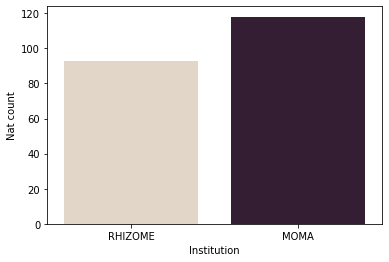

In [133]:
sns.barplot(x="Institution", y="Nat count", palette="ch:.25", data=nat_counts)

In [6]:

text_rh = pd.read_pickle('MOMA_data/pickle/new_artworks.pkl')

In [7]:
text_rh

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,1987,Paint and colored pencil on print,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,French,M
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,missing,M
31,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/33,http://www.moma.org/media/W1siZiIsIjIwMCJdLFsi...,missing,M
35,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/38,http://www.moma.org/media/W1siZiIsIjI2NyJdLFsi...,missing,M
40,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Ink on tracing paper,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/44,http://www.moma.org/media/W1siZiIsIjI5NiJdLFsi...,missing,M
...,...,...,...,...,...,...,...,...,...,...,...
138114,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020-10-07,missing,missing,Argentine,missing
138115,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020-10-07,missing,missing,Argentine,missing
138116,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020-10-07,missing,missing,Argentine,missing
138117,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020-10-07,missing,missing,Argentine,missing


Trials with code made by Laurent

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd



rhz_artworks = pd.read_pickle('Rhizome_data/rhizome_artworks_extra.pkl')
rhz_artists = pd.read_pickle('Rhizome_data/rhizome_artists_extra.pkl')
moma_artists = pd.read_pickle('MOMA_data/pickle/MoMAartists.pkl')
moma_artworks_old = pd.read_pickle('MOMA_data/pickle/old_artworks.pkl')
moma_artworks_new = pd.read_pickle('MOMA_data/pickle/new_artworks.pkl')


In [2]:

rhizome_male_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'M']
rhizome_male_artworks = rhizome_male_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
rhizome_female_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'F']
rhizome_female_artworks = rhizome_female_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
rhizome_gender_artworks = pd.merge(rhizome_male_artworks, rhizome_female_artworks, left_on='Date Acquired', right_on='Date Acquired')
rhizome_gender_artworks = rhizome_gender_artworks.sort_values(by='Date Acquired')
rhizome_gender_artworks = rhizome_gender_artworks.reset_index(drop=True)
rhizome_gender_artworks = rhizome_gender_artworks.drop(index=0, axis=0)
rhizome_gender_artworks

,Date Acquired,Male Artists,Female Artists
1,2000,4,4
2,2001,163,70
3,2002,165,72
4,2003,103,24
5,2004,167,76
6,2005,173,63
7,2006,146,55
8,2007,180,84
9,2008,91,31
10,2009,61,7


In [3]:
moma_new_artworks_male = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'M']
moma_new_artworks_male.loc[:,'DateAcquired'] = moma_new_artworks_male['DateAcquired'].where((moma_new_artworks_male['DateAcquired'].str.len() <= 4), moma_new_artworks_male['DateAcquired'].str[0:4])
moma_new_artworks_male = moma_new_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_new_artworks_female = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'F']
moma_new_artworks_female.loc[:,'DateAcquired'] = moma_new_artworks_female['DateAcquired'].where((moma_new_artworks_female['DateAcquired'].str.len() <= 4), moma_new_artworks_female['DateAcquired'].str[0:4])
moma_new_artworks_female = moma_new_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_new_gender_artworks = pd.merge(moma_new_artworks_male, moma_new_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.sort_values(by='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.reset_index(drop=True)
moma_new_gender_artworks = moma_new_gender_artworks.drop(index=0, axis=0)
moma_new_gender_artworks

/var/folders/qj/xh48vw9d4z5_h6wzs6r2smdh0000gn/T/ipykernel_7917/1788612624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moma_new_artworks_male.loc[:,'DateAcquired'] = moma_new_artworks_male['DateAcquired'].where((moma_new_artworks_male['DateAcquired'].str.len() <= 4), moma_new_artworks_male['DateAcquired'].str[0:4])
/var/folders/qj/xh48vw9d4z5_h6wzs6r2smdh0000gn/T/ipykernel_7917/1788612624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moma_new_artworks_female.loc[:,'DateAcquired'] = moma_new_ar

,Date Acquired,Male Artists,Female Artists
1,1981,203,14
2,1982,153,33
3,1983,423,43
4,1984,342,66
5,1985,353,62
6,1986,511,61
7,1987,475,56
8,1988,564,74
9,1989,322,85
10,1990,562,95


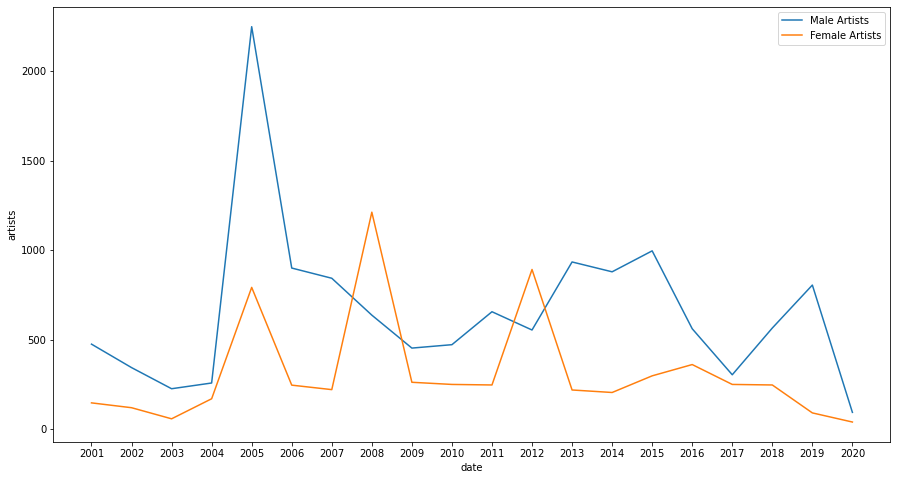

In [4]:
#dual line plot w/ cat variable over time (gender, date acquired), one database 

plots = dict(date=moma_new_gender_artworks['Date Acquired'][20:40], artists=moma_new_gender_artworks['Male Artists'][20:40], artists_2=moma_new_gender_artworks['Female Artists'][20:40])
data = pd.DataFrame(plots)
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.lineplot(x='date', y='artists', data=data, label='Male Artists')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1 = sns.lineplot(x='date', y='artists_2', data=data, label='Female Artists')

Text(0, 0.5, 'y2')

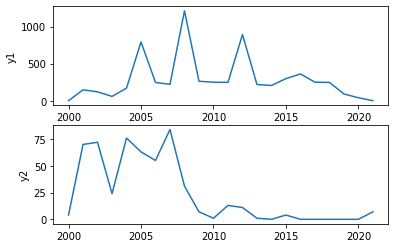

In [5]:
#FEMALE ARTISTS ACQUISITION comparison across datasets, over time (date acquired)

moma_new_gender_artworks_2 = moma_new_gender_artworks.drop('Male Artists', axis=1)
moma_new_gender_artworks_2 = moma_new_gender_artworks_2[20:40]
rhizome_gender_artworks_2 = rhizome_gender_artworks.drop('Male Artists', axis=1)
female_acquired = pd.merge(moma_new_gender_artworks_2, rhizome_gender_artworks_2, on='Date Acquired', how='outer')
female_acquired = female_acquired.fillna('0')
female_acquired = female_acquired.astype(int)
female_acquired = female_acquired.sort_values(by='Date Acquired')

x = female_acquired['Date Acquired']
y1 = female_acquired['Female Artists_x']
y2 = female_acquired['Female Artists_y']
f, axes = plt.subplots(2, 1)
axes[0].plot(x, y1)
axes[0].set_ylabel('y1')

axes[1].plot(x, y2)
axes[1].set_ylabel('y2')

In [6]:
#cat variable (gender), across two dbs w/ sampling 

moma_genders = moma_artists['Gender']
moma_artists_2 = moma_artists.sample(n=1301)
rhz_artists_copy = rhz_artists.copy()
real_gender = rhz_artists_copy['Gender']
guessed_gender = rhz_artists_copy['genderGuessed']
genders = [real_gender, guessed_gender]
rhz_artists_copy['Gender_2'] = pd.concat(genders, axis=1)
moma_artists['Source'] = 'MOMA'
rhz_artists['Source'] = 'Rhizome'
moma = moma_artists[['Gender', 'Source']]
rhizome = rhz_artists[['Gender', 'Source']]
frames = [moma, rhizome]
combined = pd.concat(frames, axis=0)
combined = combined.reset_index(drop=True)
moma_artists_2['Source'] = 'MOMA'
moma_2 = moma_artists_2[['Gender', 'Source']]
frames_2 = [moma_2, rhizome]
combined_2 = pd.concat(frames_2, axis=0)
combined_2 = combined_2.reset_index(drop=True)

KeyError: 'genderGuessed'

In [7]:
moma_photo = moma_artworks_new[moma_artworks_new['Department'] == 'Photography']
moma_medium_male = moma_photo.loc[moma_photo['Gender'] == 'M']
moma_medium_male = moma_medium_male['Medium'].value_counts().rename_axis('Medium').reset_index(name='Male Artists')
moma_medium_female = moma_photo.loc[moma_photo['Gender'] == 'F']
moma_medium_female = moma_medium_female['Medium'].value_counts().rename_axis('Medium').reset_index(name='Female Artists')
moma_medium_pyramid = pd.merge(moma_medium_male, moma_medium_female, on='Medium', how='outer')
moma_medium_pyramid = moma_medium_pyramid.fillna('0')
moma_medium_pyramid['Male Artists'] = moma_medium_pyramid['Male Artists'].astype(int)
moma_medium_pyramid['Female Artists'] = moma_medium_pyramid['Female Artists'].astype(int)
moma_medium_pyramid = moma_medium_pyramid.reset_index(drop=True)
moma_medium_pyramid = moma_medium_pyramid.set_index('Medium')
moma_medium_pyramid

,Male Artists,Female Artists
Medium,,
Gelatin silver print,1806,254
Chromogenic color print,648,310
Pigmented inkjet print,279,171
Page with chromogenic color print and text,125,0
Silver dye bleach print,66,39
...,...,...
Chromogenic color print (Digital exposure to Fujiflex paper),0,1
Four pigmented inkjet prints,0,1
"Silver dye bleach print, printed 2009",0,1


In [8]:
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Male Artists'] > 1]
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Female Artists'] > 1]
moma_medium_pyramid

,Male Artists,Female Artists
Medium,,
Gelatin silver print,1806,254
Chromogenic color print,648,310
Pigmented inkjet print,279,171
Silver dye bleach print,66,39
Pigmented inkjet prints,49,6
Color instant print (Polaroid),27,4
"Gelatin silver print, printed 1996",17,3
Gelatin silver prints,16,8
"Gelatin silver print, printed 2016",10,3


In [9]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = moma_medium_pyramid.index
column0 = moma_medium_pyramid['Male Artists']
column1 = moma_medium_pyramid['Female Artists']
title0 = 'Male Artists'
title1 = 'Female Artists'

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


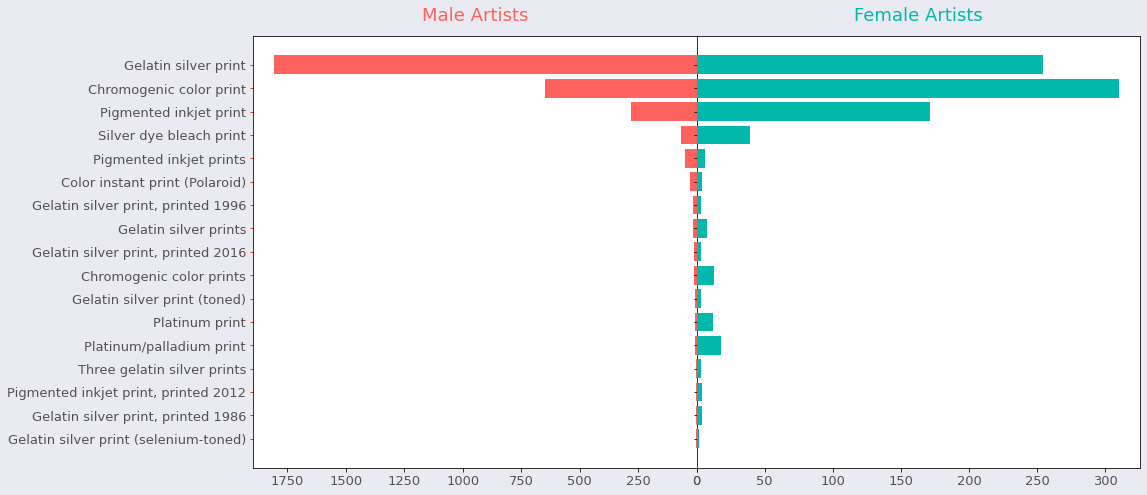

In [10]:
fig, axes = plt.subplots(figsize=(16,8), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=30)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=30)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
# To show data from highest to lowest
plt.gca().invert_yaxis()
axes[0].set(yticks=moma_medium_pyramid.index, yticklabels=moma_medium_pyramid.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='red') # tick color
#axes[1].set_xticks([0, 100, 200, 300, 400])
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

In [71]:
#artist nationalities over the two databases (too many items?)
rhz = workingDf[workingDf.Source =='RHIZOME']
rhz

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender,Source
153786,ZUR FARBENLEHRE (THEORY OF COLOURS),Steven Jones,879,2007,NaN,NaN,2007,https://artbase.rhizome.org/wiki/Q2423,NaN,British,M,RHIZOME
153787,Zones de Convergence,cicero,1020,2005,NaN,NaN,2005,https://artbase.rhizome.org/wiki/Q4089,NaN,missing,missing,RHIZOME
153788,"Zaira, City of Memories",Gokcen Erguven,312,2004,NaN,NaN,2004,https://artbase.rhizome.org/wiki/Q4374,NaN,Turkish,F,RHIZOME
153789,Z_G [zeitgeist gestalten],Tiago Borges,920,2007,NaN,NaN,2008,https://artbase.rhizome.org/wiki/Q3972,NaN,Angolan,M,RHIZOME
153790,Z,Antoni Abad,80,2001,NaN,NaN,2003,https://artbase.rhizome.org/wiki/Q2580,NaN,Spanish,M,RHIZOME
...,...,...,...,...,...,...,...,...,...,...,...,...
156214,[V]ote-auction,UBERMORGEN,1202,2000,NaN,NaN,2001,https://artbase.rhizome.org/wiki/Q2916,NaN,Austrian,F,RHIZOME
156215,[V]ote-auction,collective member,1206,2000,NaN,NaN,2001,https://artbase.rhizome.org/wiki/Q2916,NaN,Swiss/American,M,RHIZOME
156216,[murmur],collective member,848,2003,NaN,NaN,2004,https://artbase.rhizome.org/wiki/Q3721,NaN,Canadian,M,RHIZOME
156217,[murmur],collective member,300,2003,NaN,NaN,2004,https://artbase.rhizome.org/wiki/Q3721,NaN,Canadian,M,RHIZOME


In [91]:
rhz_nat = set(rhz.Nationality.str.strip())
rhz_nat_counts = pd.DataFrame(columns=['Nationality', 'Count Rhizome'] )
for item in rhz_nat:
    row = list()
    row.append(item)
    count = len(rhz[rhz.Nationality == item])
    row.append(count)

    rhz_nat_counts.loc[len(rhz_nat_counts)]= row

In [92]:
moma = workingDf[workingDf.Source =='MOMA']
moma
moma_nat = set(moma.Nationality.str.strip())
moma_nat_counts = pd.DataFrame(columns=['Nationality', 'Count Moma'] )
for item in moma_nat:
    row = list()
    row.append(item)
    count = len(moma[moma.Nationality == item])
    row.append(count)

    moma_nat_counts.loc[len(moma_nat_counts)]= row

In [111]:
all_nats = pd.merge(rhz_nat_counts, moma_nat_counts, on='Nationality', how='outer')

In [112]:
all_nats['Count Rhizome']=all_nats['Count Rhizome'].fillna(0).astype('int')
all_nats['Count Moma']=all_nats['Count Moma'].fillna(0).astype('int')
all_nats = all_nats[all_nats['Count Rhizome'] > 0]
all_nats = all_nats[all_nats['Count Moma'] > 1]
all_nats



,Nationality,Count Rhizome,Count Moma
0,Haitian,1,20
2,Puerto Rican,2,14
3,French,137,24230
4,Latvian,1,75
5,Greek,5,56
6,Colombian,13,791
9,Indian,3,240
10,Australian,31,264
11,Irish,2,60
12,Swedish,35,344


In [121]:
tot_moma = all_nats['Count Moma'].sum()
tot_rhz = all_nats['Count Rhizome'].sum()
tot_moma
for idx, row in all_nats.iterrows():
    moma_per = (row['Count Moma']/tot_moma)*100
    all_nats.at[idx, 'Count Moma']=moma_per
    rhz_per = (row['Count Rhizome']/tot_rhz)*100
    all_nats.at[idx,'Count Rhizome']=rhz_per

all_nats

    

,Nationality,Count Rhizome,Count Moma
0,Haitian,0.045537,0.013402
2,Puerto Rican,0.091075,0.009381
3,French,6.238616,16.236464
4,Latvian,0.045537,0.050257
5,Greek,0.227687,0.037525
6,Colombian,0.591985,0.530047
9,Indian,0.136612,0.160823
10,Australian,1.411658,0.176906
11,Irish,0.091075,0.040206
12,Swedish,1.593807,0.230514


In [135]:
all_nats = all_nats[all_nats['Count Rhizome'] > 0.05]
all_nats = all_nats[all_nats['Count Moma'] > 0.05]

In [136]:
all_nats

,Nationality,Count Rhizome,Count Moma
3,French,6.238616,16.236464
6,Colombian,0.591985,0.530047
9,Indian,0.136612,0.160823
10,Australian,1.411658,0.176906
12,Swedish,1.593807,0.230514
14,Italian,3.551913,2.281682
18,Hungarian,0.182149,0.546130
21,Israeli,1.275046,0.247266
23,South African,0.136612,0.304224
24,Mexican,0.637523,0.964270


In [131]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#38828f'
color_blue = '#4d125e'
index = all_nats.index
column0 = all_nats['Count Moma']
column1 = all_nats['Count Rhizome']
title0 = 'MOMA'
title1 = 'RHIZOME'

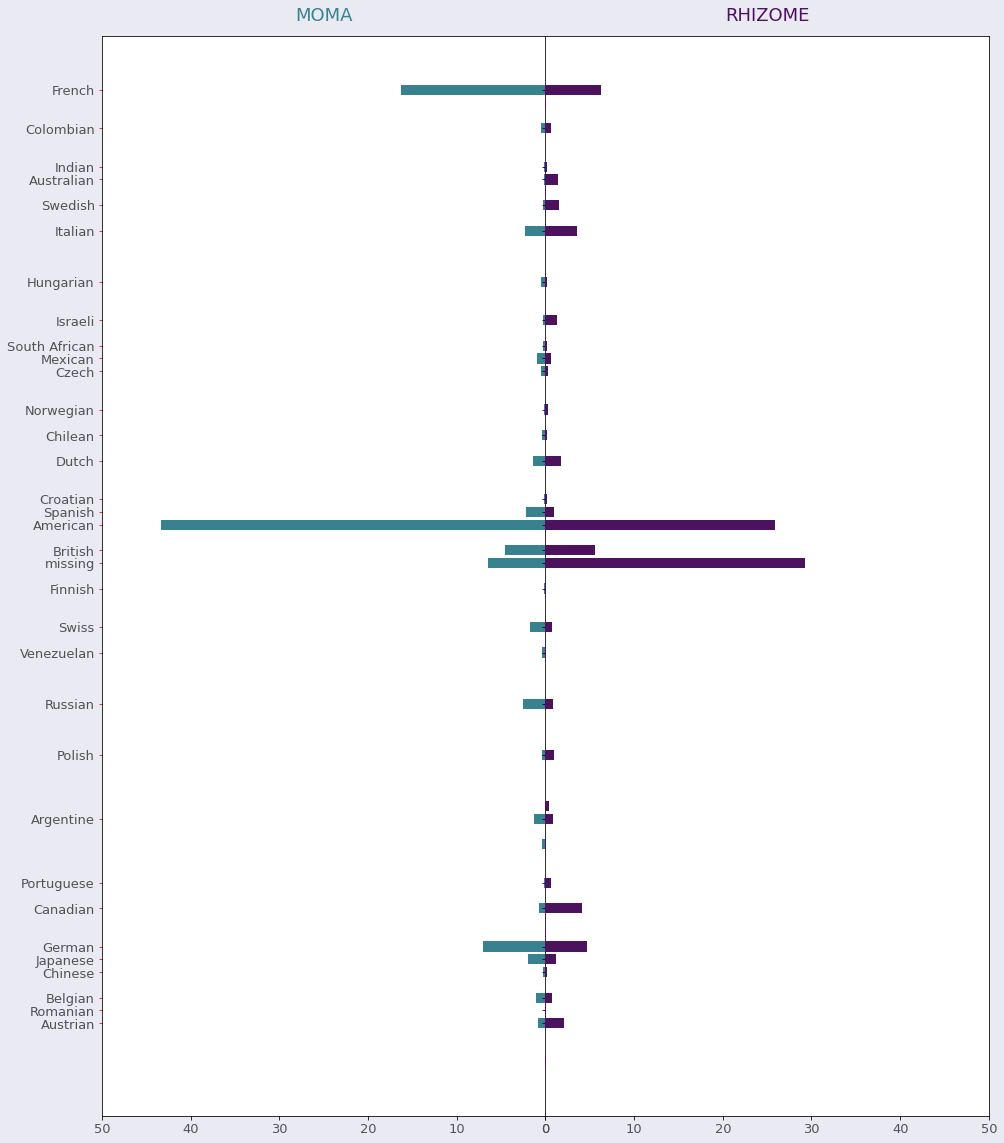

In [137]:
fig, axes = plt.subplots(figsize=(16,20), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=76)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=76)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
# To show data from highest to lowest
plt.gca().invert_yaxis()
axes[0].set(yticks=all_nats.index, yticklabels=all_nats.Nationality)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='red') # tick color
axes[0].set_xticks([0, 10, 20, 30, 40, 50])
axes[1].set_xticks([0, 10, 20, 30, 40, 50])
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

# Plotly Visualizations for gender and nationality comparison

In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

## Acquisition overview of Moma and Rhizome

Count of how many artworks for each country have been added to the MoMA (new and old) and Rhizome collections

### MoMA's created before 1980

In [119]:
before80

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,1896,Ink and cut-and-pasted painted pages on paper,Architecture & Design,1996,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,Austrian,M
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,1903,"Graphite, pen, color pencil, ink, and gouache ...",Architecture & Design,1997,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,Austrian,M
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,1903,"Graphite, color pencil, ink, and gouache on tr...",Architecture & Design,1997,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,Austrian,M
5,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photograph,Architecture & Design,1995,http://www.moma.org/collection/works/7,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsi...,missing,M
6,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1976,Gelatin silver photographs,Architecture & Design,1995,http://www.moma.org/collection/works/8,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsi...,missing,M
...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007",1890,Gelatin silver print,Photography,2020,http://www.moma.org/collection/works/418928,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJd...,"missing, American, American","missing, M, M"
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,1939,One from an illustrated book with four line bl...,Drawings & Prints,2019,http://www.moma.org/collection/works/419286,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJd...,Swiss,F
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,1939,One from an illustrated book with four line bl...,Drawings & Prints,2019,http://www.moma.org/collection/works/419287,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJd...,Swiss,F
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,1939,One from an illustrated book with four line bl...,Drawings & Prints,2019,http://www.moma.org/collection/works/419288,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJd...,Swiss,F


In [120]:

before80.Nationality = before80.Nationality.astype('str')
nats = ', '.join(before80.Nationality)
nats = list(set(nats.split(', ')))
df_nats_before = pd.DataFrame()

for nation in nats:
    subset = before80[before80.Nationality == nation]
    for country in nats:
        nat_sub =  subset[subset.Nationality == country]    
        nat_sub.DateAcquired = nat_sub.DateAcquired.astype('str')
        years = ', '.join(nat_sub.DateAcquired)
        years = sorted(list([item[:4] for item in list(set(years.split(', ')))]))[0:-1]
        for year in years:
            year_sub = nat_sub[nat_sub.DateAcquired == year]
            entries_year = len(year_sub)
            f_count = len(year_sub[year_sub.Gender == 'F'])
            new_row = pd.DataFrame([[country, year, entries_year, f_count]])
            df_nats_before = pd.concat([df_nats_before, new_row], axis=0, ignore_index=True)

df_nats_before    

,0,1,2,3
0,Peruvian,1942,2,0
1,Peruvian,1952,9,0
2,Peruvian,1965,1,0
3,Peruvian,1966,1,0
4,Peruvian,1968,5,1
...,...,...,...,...
2401,Uruguayan,2012,1,0
2402,Uruguayan,2014,2,0
2403,Uruguayan,2015,2,0
2404,Uruguayan,2016,3,1


In [121]:
df_nats_before.columns= ["Nation", "DateAcquired", "Count", "Females"]


In [122]:
import plotly.express as px
fig = px.area(df_nats_before, x="DateAcquired", y="Count", color="Nation", line_group="Nation")
fig.show()

### MoMA's created after 1980

In [104]:
after80

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,1987,Paint and colored pencil on print,Architecture & Design,1995,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,French,M
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,missing,M
31,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/33,http://www.moma.org/media/W1siZiIsIjIwMCJdLFsi...,missing,M
35,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995,http://www.moma.org/collection/works/38,http://www.moma.org/media/W1siZiIsIjI2NyJdLFsi...,missing,M
40,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Ink on tracing paper,Architecture & Design,1995,http://www.moma.org/collection/works/44,http://www.moma.org/media/W1siZiIsIjI5NiJdLFsi...,missing,M
...,...,...,...,...,...,...,...,...,...,...,...
138114,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020,missing,missing,Argentine,missing
138115,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020,missing,missing,Argentine,missing
138116,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020,missing,missing,Argentine,missing
138117,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020,missing,missing,Argentine,missing


In [127]:
after80.Nationality = after80.Nationality.astype('str')
nats = ', '.join(after80.Nationality)
nats = list(set(nats.split(', ')))
df_nats_after = pd.DataFrame()

for nation in nats:
    subset = after80[after80.Nationality == nation]
    for country in nats:
        nat_sub =  subset[subset.Nationality == country]    
        nat_sub.DateAcquired = nat_sub.DateAcquired.astype('str')
        years = ', '.join(nat_sub.DateAcquired)
        years = sorted(list([item[:4] for item in list(set(years.split(', ')))]))[0:-1]
        for year in years:
            year_sub = nat_sub[nat_sub.DateAcquired == year]
            entries_year = len(year_sub)
            f_count = len(year_sub[year_sub.Gender == 'F'])
            new_row = pd.DataFrame([[country, year, entries_year, f_count]])
            df_nats_after = pd.concat([df_nats_after, new_row], axis=0, ignore_index=True)

df_nats_after   

,0,1,2,3
0,Peruvian,1981,1,0
1,Peruvian,1984,1,1
2,Peruvian,2003,1,0
3,Peruvian,2005,1,0
4,Peruvian,2007,4,3
...,...,...,...,...
1003,Uruguayan,2005,3,0
1004,Uruguayan,2010,1,0
1005,Uruguayan,2013,1,0
1006,Uruguayan,2016,1,0


In [128]:
df_nats_after.columns= ["Nation", "DateAcquired", "Count", "Females"]


In [111]:
import plotly.express as px


### Rhizome's 

In [112]:
rhizome

,ID,URL,Title,Artist,dateAcquired,dateCreated,Nationality,Gender
0,879,https://artbase.rhizome.org/wiki/Q2423,ZUR FARBENLEHRE (THEORY OF COLOURS),Steven Jones,2007,2007,British,M
1,1020,https://artbase.rhizome.org/wiki/Q4089,Zones de Convergence,cicero,2005,2005,missing,missing
2,"243, 701",https://artbase.rhizome.org/wiki/Q1475,Zombie and Mummy,"Dragan Espenschied, Olia Lialina",2004,2002,"German, Russian","M, F"
3,312,https://artbase.rhizome.org/wiki/Q4374,"Zaira, City of Memories",Gokcen Erguven,2004,2004,Turkish,F
4,920,https://artbase.rhizome.org/wiki/Q3972,Z_G [zeitgeist gestalten],Tiago Borges,2008,2007,Angolan,M
...,...,...,...,...,...,...,...,...
2265,1075,https://artbase.rhizome.org/wiki/Q4358,1999,joan escofet,2001,2000,missing,missing
2266,771,https://artbase.rhizome.org/wiki/Q3761,1969,Rhea Myers,2004,2004,British,F
2267,859,https://artbase.rhizome.org/wiki/Q2283,1953,Skye Thorstenson,2003,2002,missing,M
2268,481,https://artbase.rhizome.org/wiki/Q2511,160,Katie Lips,2005,2005,British,F


In [115]:

rhizome.Nationality = rhizome.Nationality.astype('str')
nats = ', '.join(rhizome.Nationality)
nats = list(set(nats.split(', ')))
df_nats_rhizome = pd.DataFrame()

for nation in nats:
    subset = rhizome[rhizome.Nationality == nation]
    for country in nats:
        nat_sub =  subset[subset.Nationality == country]    
        nat_sub.DateAcquired = nat_sub.dateAcquired.astype('str')
        years = ', '.join(nat_sub.DateAcquired)
        years = sorted(list([item[:4] for item in list(set(years.split(', ')))]))[0:-1]
        for year in years:
            year_sub = nat_sub[nat_sub.DateAcquired == year]
            entries_year = len(year_sub)
            f_count = len(year_sub[year_sub.Gender == 'F'])
            new_row = pd.DataFrame([[country, year, entries_year, f_count]])
            df_nats_rhizome = pd.concat([df_nats_rhizome, new_row], axis=0, ignore_index=True)

df_nats_rhizome    

/var/folders/qj/xh48vw9d4z5_h6wzs6r2smdh0000gn/T/ipykernel_50550/4187758913.py:10: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,0,1,2,3
0,Serbian,2001,1,0
1,Serbian,2006,5,0
2,American/South African,2001,3,0
3,American/South African,2002,1,0
4,American/South African,2004,1,0
...,...,...,...,...
281,Czech,2001,2,2
282,Czech,2003,1,0
283,Czech,2006,2,1
284,Brasilian/American,0,1,0


In [116]:
df_nats_rhizome.columns= ["Nation", "DateAcquired", "Count", "Females"]

In [117]:
fig = px.area(df_nats_rhizome, x="DateAcquired", y="Count", color="Nation", line_group="Nation")
fig.show()

## Acquisition of artworks by female over total -- of Moma and Rhizome

Count of how many artworks for each country have been added to the MoMA (new and old) and Rhizome collections, compared with the number of artworks acquired made by only a female artist. 

Visualization is on categorical data (gender, nationality), ordinal data (acquisition year) and numerical data (tot artworks per nationality  count, artworks by a female artist per nationality)

In [125]:
import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_dark"


fig1 = px.scatter(df_nats_before,
                 x="DateAcquired", y="Count", size="Females", color="Nation",
                 log_x=True, size_max=30,
                 title="MoMA's created before 1980")
fig1.show()

In [130]:
fig2 = px.scatter(df_nats_after,
                 x="DateAcquired", y="Count", size="Females", color="Nation",
                 log_x=True, size_max=30,
                 title="MoMA's created after 1980")
fig2.show()

In [131]:
fig3 = px.scatter(df_nats_rhizome,
                 x="DateAcquired", y="Count", size="Females", color="Nation",
                 log_x=True, size_max=30,
                 title="Rhizome's")
fig3.show()